# Oppenheimer-Snyder collapse

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

The computations make use of tools developed through the [SageManifolds project](https://sagemanifolds.obspm.fr).

In [1]:
version()

'SageMath version 9.5.beta8, Release Date: 2021-12-12'

In [2]:
%display latex

Due to spherical symmetry, we a considering a 2-dimensional cut at $(\theta,\varphi) = \mathrm{const}$:

In [3]:
M = Manifold(2, 'M', structure='Lorentzian')
EF.<ti, r> = M.chart(r"ti:\tilde{t} r:[0,+oo)")
EF

Chart (M, (ti, r))

In [4]:
EF.coord_range()

ti: (-oo, +oo); r: [0, +oo)

## Interior

In [5]:
I = M.open_subset('I')

We choose $\chi_{\rm s} = \pi/4$:

In [6]:
S.<eta,chi> = I.chart(r"eta:[0,pi]:\eta chi:[0,pi/4]:\chi")
S

Chart (I, (eta, chi))

In [7]:
S.coord_range()

eta: [0, pi]; chi: [0, 1/4*pi]

In [8]:
S.coord_bounds()

(((0, True), (pi, True)), ((0, True), (1/4*pi, True)))

In [9]:
chis = S.coord_bounds()[1][1][0]
chis

1/4*pi

The initial areal radius of the star in units of $m_0$:

In [10]:
r0 = 2/sin(chis)^2 
r0

4

## Global evolution curves

$r_{\rm s}(\eta)$ in units of $r_0$:

In [11]:
rsurf(eta) = (1 + cos(eta))/2
rsurf

eta |--> 1/2*cos(eta) + 1/2

Matter proper time $\tau$ in units of $\sqrt{r_0^3/(8 m_0)}$:µ

In [12]:
tau(eta) = (eta + sin(eta))/2
tau

eta |--> 1/2*eta + 1/2*sin(eta)

Proper energy density $\rho$ in units of $6 m_0 / (\pi r_0^3)$:

In [13]:
rho(eta) = 1 / (1 + cos(eta))^3
rho

eta |--> (cos(eta) + 1)^(-3)

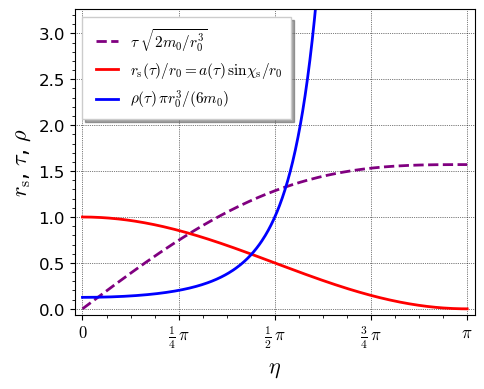

In [14]:
graph = plot(tau, (0, pi), color='purple', thickness=2, linestyle='--',
             legend_label=r'$\tau \;  \sqrt{2 m_0 / r_0^3}$',
             axes_labels=[r'$\eta$', r'$r_{\rm s}$, $\tau$, $\rho$'],
             ticks=[pi/4, None], tick_formatter=[pi, None], fontsize=12,
             axes_labels_size=1.4,
             frame=True, axes=False, gridlines=True) \
        + plot(rsurf, (0, pi), color='red', thickness=2, 
               legend_label=r'$r_{\rm s}(\tau)/r_0 = a(\tau)\, \sin\chi_{\rm s} / r_0$') \
        + plot(rho, (0, 2), color='blue', thickness=2, 
               legend_label=r'$\rho(\tau) \, \pi r_0^3/(6 m_0)$')
graph.set_legend_options(handlelength=2, labelspacing=0.5,
                         font_size=11)
graph.set_aspect_ratio(0.75)
graph.show(ymax=3.2)
graph.save('lem_OS_rs_rho_eta.pdf', ymax=3.2)

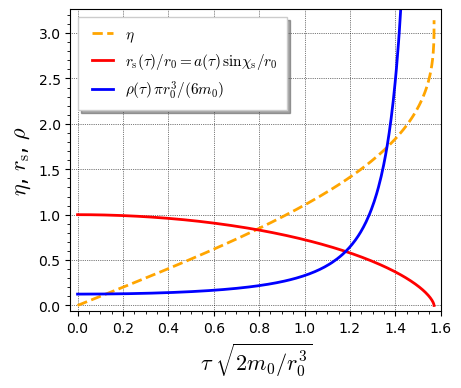

In [15]:
graph = parametric_plot((tau(eta), eta), (eta, 0, pi), color='orange', 
                        linestyle='--', thickness=2, 
                        legend_label=r'$\eta$',
                        axes_labels=[r'$\tau \; \sqrt{2m_0/r_0^3}$', 
                                     r'$\eta$, $r_{\rm s}$, $\rho$'], 
                        frame=True, axes=False, gridlines=True) \
        + parametric_plot((tau(eta), rsurf(eta)), (eta, 0, pi), color='red',
                          thickness=2, 
                          legend_label=r'$r_{\rm s}(\tau)/r_0 = a(\tau)\, \sin\chi_{\rm s} / r_0$') \
        + parametric_plot((tau(eta), rho(eta)), (eta, 0, 2), color='blue', 
                          thickness=2, 
                          legend_label=r'$\rho(\tau) \, \pi r_0^3/(6 m_0)$')
graph.set_legend_options(handlelength=2, labelspacing=0.5,
                         font_size=11)
graph.set_aspect_ratio(0.4)
graph.show(ymax=3.2)
graph.save('lem_OS_rs_rho_tau.pdf', ymax=3.2)

$\eta$ as a function of $\tau/m_0$:

In [16]:
def etaf(tau):
    def ff(et):
        return (et + sin(et))/sin(chis)^3 - tau
    return find_root(ff, 0, pi)

Value of the matter proper time $\tau$ at the end of the collapse, in units of $m_0$:

In [17]:
tau_end = pi/sin(chis)^3
tau_end, n(tau_end)

(2*sqrt(2)*pi, 8.88576587631673)

Check:

In [18]:
etaf(tau_end) == n(pi)

True

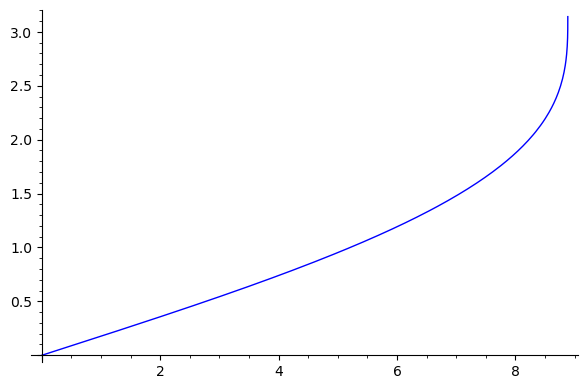

In [19]:
plot(etaf, 0, tau_end)

## Plot of the interior region in the $(\eta,\chi)$ plane

Constant $\chi$ lines

In [20]:
graph = S.plot(S, ambient_coords=(chi, eta), style={eta: '-', chi: '--'},
               number_values={eta: 2, chi: 9})

Constant $\tau$ lines

In [21]:
tau_sel = [numerical_approx(i*tau_end/8) for i in range(9)]
tau_sel

[0.000000000000000,
 1.11072073453959,
 2.22144146907918,
 3.33216220361878,
 4.44288293815837,
 5.55360367269796,
 6.66432440723755,
 7.77504514177714,
 8.88576587631673]

In [22]:
eta_sel = [etaf(tau0) for tau0 in tau_sel]
eta_sel

[0.0,
 0.1969852777521357,
 0.39790775618592655,
 0.6073795752895496,
 0.8317111935799412,
 1.0810453707259005,
 1.3752523669869274,
 1.7683424316081915,
 3.141592653589793]

In [23]:
iso_taus = [I.curve({S: [eta0, chi]}, (chi, 0, chis)) for eta0 in eta_sel]

In [24]:
for iso_tau in iso_taus:
    graph += iso_tau.plot(chart=S, ambient_coords=(chi, eta), color='red',
                          style='--')

The stellar surface:

In [25]:
surf = I.curve({S: [eta, chis]}, (eta, 0, pi)) 
graph += surf.plot(S, ambient_coords=(chi, eta), thickness=3)

The star at $\eta=0$:

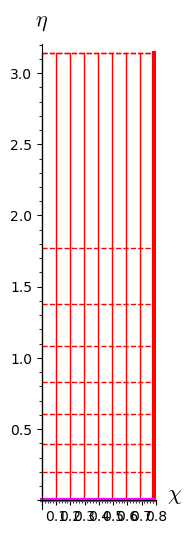

In [26]:
init= I.curve({S: [0, chi]}, (chi, 0, chis)) 
graph += init.plot(S, ambient_coords=(chi, eta), 
                   color='magenta', thickness=3)
graph.show(figsize=8)

## Null radial geodesics in the interior

### Functions initializing the internal null geodesics

In [27]:
def geod_int_out(etas):
    r"""
    Internal outgoing radial null geodesic ending at
    (eta, chi) = (etas, chis)
    """
    chi_min = 0 if etas > chis else chis - etas
    return I.curve({S: [chi - chis + etas, chi]}, (chi, chi_min, chis))

def geod_int_in(etas):
    r"""
    Internal ingoing radial null geodesic starting at
    (eta, chi) = (etas, chis)
    """
    chi_min = 0 if etas < pi - chis else etas - pi + chis
    return I.curve({S: [chis - chi + etas, chi]}, (chi, chi_min, chis))

### The event horizon

In [28]:
hor_int = geod_int_out(pi - 2*chis)
graph += hor_int.plot(chart=S, ambient_coords=(chi, eta),
                      color='black', thickness=3)

### The final singularity

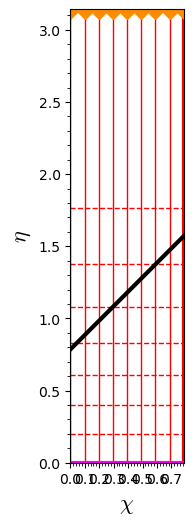

In [29]:
matter_sing = I.curve({S: [pi, chi]}, (chi, 0, chis))

graph += line([(0 + i*chis/8, pi) for i in range(9)], 
              thickness=3, color='darkorange',
              marker='D',  markersize=10)
graph.show(frame=True, axes_pad=0, figsize=8)

## Eddington-Finkelstein-type coordinates for the interior

In [30]:
EFI = EF.restrict(I)
I.atlas()

[Chart (I, (eta, chi)), Chart (I, (ti, r))]

In [31]:
S_to_EF = S.transition_map(EFI, 
                           [2*(sqrt(r0/2 - 1)*(eta + r0/4*(eta + sin(eta))) 
                             + 2*ln(cos(eta/2) + sin(eta/2)/sqrt(r0/2 - 1))),
                            r0*sin(chi)/sin(chis)/2*(1 + cos(eta))])
S_to_EF.display()

ti = 4*eta + 4*log(cos(1/2*eta) + sin(1/2*eta)) + 2*sin(eta)
r = 2*sqrt(2)*(cos(eta) + 1)*sin(chi)

In [32]:
S_to_EF(eta, chi)

(4*eta + 4*log(cos(1/2*eta) + sin(1/2*eta)) + 2*sin(eta),
 2*sqrt(2)*cos(eta)*sin(chi) + 2*sqrt(2)*sin(chi))

In [33]:
rr(eta, chi) = S_to_EF(eta, chi)[1]
rr

(eta, chi) |--> 2*sqrt(2)*cos(eta)*sin(chi) + 2*sqrt(2)*sin(chi)

Adding isocontours $r = \mathrm{const}$:

In [34]:
graph += contour_plot(rr(eta, chi), (chi, 0, chis), (eta, 0, 3.13), 
                      contours=[0.5, 1., 1.5, 2., 2.5, 3., 3.5], 
                      fill=False, labels=True, label_colors='black',
                      label_inline=True, label_inline_spacing=10)

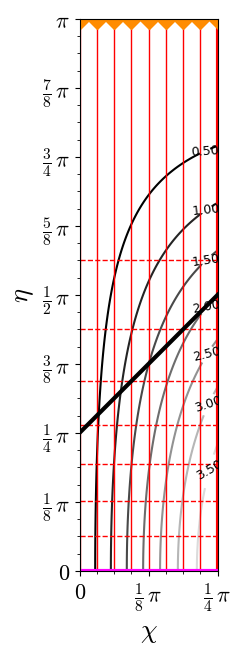

In [35]:
graph.show(frame=True, axes_pad=0, ticks=[pi/8,pi/8], tick_formatter=(pi,pi), 
           fontsize=16, axes_labels_size=1.2, figsize=10)

In [36]:
ITH = I.curve({S: [pi - 2*chi, chi]}, (chi, 0, chis))

graph += ITH.plot(chart=S, ambient_coords=(chi, eta), color='blue', 
                  thickness=3, style=':', label_axes=False)

In [37]:
graph_trap = copy(graph)

A selection of null geodesics:

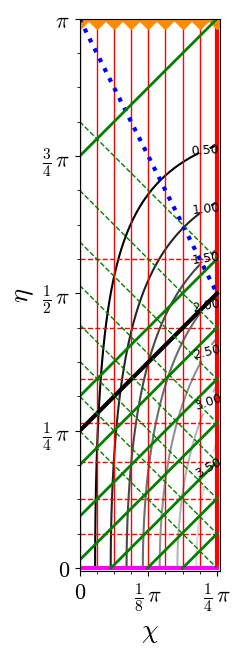

In [38]:
geod_int_out_sel = [geod_int_out(etas) for etas in eta_sel]
geod_int_in_sel = [geod_int_in(etas) for etas in eta_sel]

for geod in geod_int_out_sel:
    graph += geod.plot(chart=S, ambient_coords=(chi, eta),
                       color='green', thickness=2)

for geod in geod_int_in_sel[:-1]:
    graph += geod.plot(chart=S, ambient_coords=(chi, eta),
                       color='green',  thickness=1, style='--')

graph.show(frame=True, axes=False, axes_pad=0, ticks=[pi/8,pi/4], 
           tick_formatter=(pi,pi), fontsize=16, axes_labels_size=1.2, 
           xmax=pi/4+0.015, ymin=-0.015, figsize=10)
graph.save('lem_OS_diag_int.pdf', frame=True, axes=False, axes_pad=0, 
           ticks=[pi/8,pi/4], tick_formatter=(pi,pi), fontsize=16, 
           axes_labels_size=1.2, xmax=pi/4+0.015, ymin=-0.015, figsize=10)

## Trapped surfaces

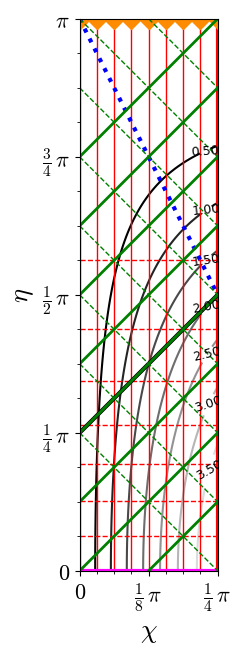

In [39]:
for i in range(9):
    etas = pi/8*i 
    graph_trap += geod_int_out(etas).plot(chart=S, 
                                          ambient_coords=(chi, eta),
                                          color='green', thickness=2)
    graph_trap += geod_int_in(etas).plot(chart=S, 
                                         ambient_coords=(chi, eta),
                                         color='green',  thickness=1, 
                                         style='--')
graph_trap.show(frame=True, axes_pad=0, ticks=[pi/8,pi/4], tick_formatter=(pi,pi), 
                fontsize=16, axes_labels_size=1.2, figsize=10)

Adding $r$ isocontours near the trapped surface at 
$(\eta,\chi) = \left(\frac{11\pi}{6}, \frac{3\pi}{16} \right)$:

In [40]:
tsp = I((11*pi/16, 3*pi/16), chart=S)

In [41]:
S(tsp)

(11/16*pi, 3/16*pi)

In [42]:
EF(tsp)

(11/4*pi + 4*log(cos(11/32*pi) + sin(11/32*pi)) + 2*sin(5/16*pi),
 -2*sqrt(2)*cos(5/16*pi)*sin(3/16*pi) + 2*sqrt(2)*sin(3/16*pi))

In [43]:
rts = n(EF(tsp)[1])
rts

0.698372454547306

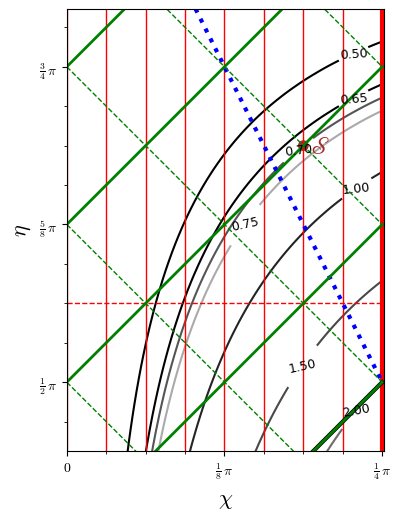

In [44]:
graph_trap += contour_plot(rr(eta, chi), (chi, 0, chis), (eta, 0, 3.13), 
                           contours=[rts - 0.05, rts, rts + 0.05], 
                           fill=False, labels=True, label_colors='black',
                           label_inline=True, label_inline_spacing=10)
graph_trap += tsp.plot(chart=S, ambient_coords=(chi, eta), color='brown',
                       label=' ', size=60) \
              + text(r"$\mathscr{S}$", (0.63, 2.16), color='brown', fontsize=18)
graph_trap.show(frame=True, axes_pad=0, ticks=[pi/8,pi/8], tick_formatter=(pi,pi),
                figsize=8, xmax=pi/4+0.005, ymin=1.4, ymax=2.5)
graph_trap.save('lem_OS_diag_int_zoom.pdf', frame=True, axes_pad=0, ticks=[pi/8,pi/8], 
                tick_formatter=(pi,pi), figsize=8, xmax=pi/4+0.005, ymin=1.4, ymax=2.5)

## Plots in terms of Eddington-Finkelstein coordinates

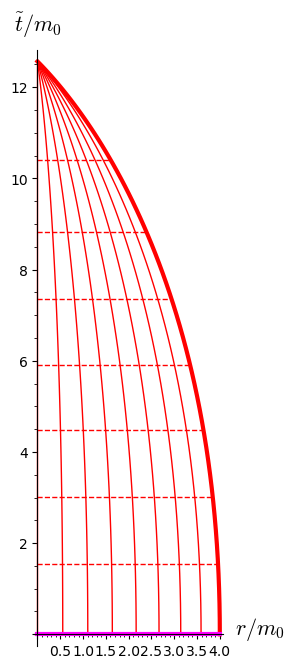

In [45]:
graph = S.plot(EFI, ambient_coords=(r, ti), style={eta: '-', chi: '--'},
               number_values={eta: 2, chi: 9}, label_axes=False) 

# The stellar surface:
graph += surf.plot(EFI, ambient_coords=(r, ti), fixed_coords={chi: chis}, 
                   thickness=3, label_axes=False)

# Constant tau lines:
for iso_tau in iso_taus:
    graph += iso_tau.plot(chart=EFI, ambient_coords=(r, ti), color='red',
                          style='--', label_axes=False)

# The initial star:
graph += init.plot(chart=EFI, ambient_coords=(r, ti), 
                   fixed_coords={chi: chis}, color='magenta', 
                   thickness=3, label_axes=False)
    
graph.axes_labels([r'$r/m_0$', r'$\tilde{t}/m_0$'])
graph.show(figsize=10)

### Coordinate $\tilde{t}$ of the collapse end point

The collapse end point correspond to $\eta = \pi$; it is thus given by `I((pi, 0))` and its $\tilde{t}$ coordinate is obtained via the chart `EF`:

In [46]:
EF(I((pi, 0)))

(4*pi, 0)

In [47]:
ti_end = EF(I((pi, 0)))[0]
ti_end

4*pi

### Drawing the singularity

Maximal value of $\tilde{t}$ for plots:

In [48]:
timax = 17

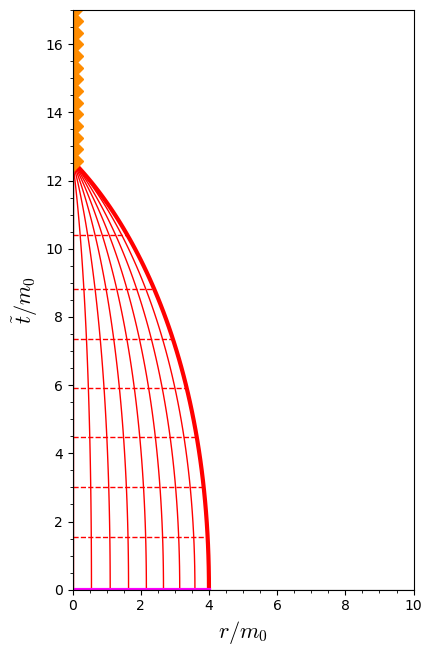

In [49]:
graph += line([(0, ti_end + i*(40 - ti_end)/80) for i in range(81)], 
              thickness=3, color='darkorange', marker='D', markersize=10)
graph.set_axes_range(xmin=0, xmax=10, ymin=0, ymax=timax)
graph.axes_labels([r'$r/m_0$', r'$\tilde{t}/m_0$'])
graph.show(frame=True, figsize=10, axes_pad=0)

### The event horizon

In [50]:
graph += hor_int.plot(chart=EFI, ambient_coords=(r, ti), color='black', 
                      thickness=3, label_axes=False)

In [51]:
hor_int(chis)

Point on the 2-dimensional Lorentzian manifold M

In [52]:
EF(hor_int(chis))

(2*pi + 2*log(2) + 2, 2)

In [53]:
tiH = EF(hor_int(chis))[0]
tiH, n(tiH)

(2*pi + 2*log(2) + 2, 9.66947966829948)

In [54]:
hor_ext = M.curve({EF: (ti, 2)}, (ti, tiH, 40))

In [55]:
graph += hor_ext.plot(chart=EF, ambient_coords=(r, ti), color='black', 
                      thickness=3, label_axes=False)

Adding the inner trapping horizon:

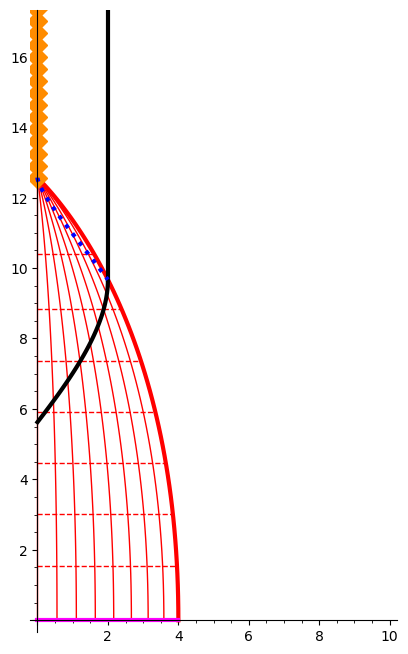

In [56]:
graph += ITH.plot(EFI, ambient_coords=(r, ti), color='blue', 
                  thickness=3, style=':', label_axes=False)
graph.set_axes_range(xmin=0, xmax=10, ymin=0, ymax=timax)
graph.show(figsize=10)

In [57]:
graph_delay = copy(graph)

### Functions initializing the external null geodesics

In [58]:
def geod_ext_out_I(tis, rs, rm):
    r"""
    External outgoing radial null geodesic starting from
    (ti, r) = (tis, rs) in region I
    """
    return M.curve({EF: [tis + r - rs + 4*ln(abs((r - 2)/(rs - 2))), r]}, (r, rs, rm))

lamb = var('lamb', latex_name=r'\lambda')
def geod_ext_out_II(tis, rs, rm):
    r"""
    External outgoing radial null geodesic starting from
    (ti, r) = (tis, rs) in region II
    """
    return M.curve({EF: [tis - lamb - rs + 4*ln(abs((-lamb - 2)/(rs - 2))), -lamb]}, (lamb, -rs, -rm))

def geod_ext_in(tis, rs, rm):
    r"""
    External ingoing radial null geodesic arriving at
    (ti, r) = (tis, rs)
    """
    return M.curve({EF: [tis - r + rs, r]}, (r, rs, rm))

In [59]:
def plot_geod_out(etas, chart=EF, plot_tangent=True, plot_int=True,
                  color='green', thickness=1.5):
    r"""
    Plot of an outgoing radial null geodesic
    """
    # Internal part of the geodesic
    gint = geod_int_out(etas)
    # External part
    tis, rs = EF(gint(chis))
    if rs < 2:
        rm = 0
        gext = geod_ext_out_II(tis, rs, rm)
        pv = -0.5*rs
    else:
        rm = 20 
        gext = geod_ext_out_I(tis, rs, rm)
        pv = 1.4*rs
    ambc = (chart[1], chart[0])
    graph = gext.plot(chart, ambient_coords=ambc, color=color, 
                      thickness=thickness, label_axes=False)
    if plot_int:
        graph += gint.plot(chart.restrict(I), ambient_coords=ambc, color=color, 
                           thickness=thickness, label_axes=False) 
    if plot_tangent:
        try:
            vtan = gext.tangent_vector_field().at(gext.domain()(n(pv)))
            graph += vtan.plot(chart, ambient_coords=ambc, color=color, 
                               scale=0.01, arrowsize=4)
        except ValueError:
            pass
    return graph

In [60]:
for etas in eta_sel:
    graph += plot_geod_out(etas)

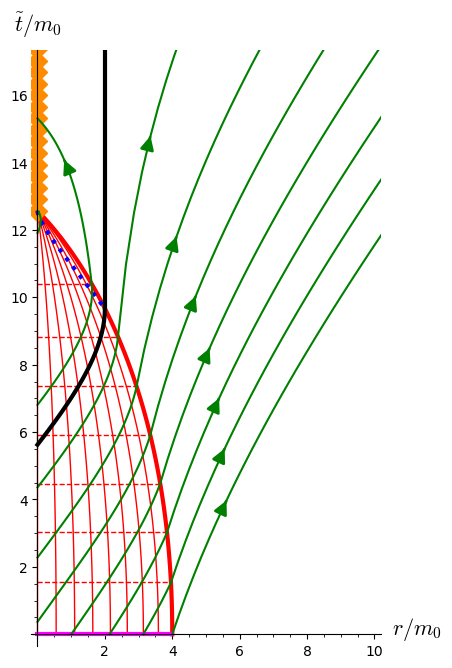

In [61]:
graph.axes_labels([r'$r/m_0$', r'$\tilde{t}/m_0$'])
graph.set_axes_range(xmin=0, xmax=10, ymin=0, ymax=timax)
graph.show(figsize=10)

In [62]:
def plot_geod_in(etas, chart=EF, color='green', thickness=1):
    r"""
    Plot of an ingoing radial null geodesic
    """
    # Internal part of the geodesic
    gint = geod_int_in(etas)
    # External part
    tis, rs = EF(gint(chis))
    rm = 20
    gext = geod_ext_in(tis, rs, rm)
    ambc = (chart[1], chart[0])
    return gint.plot(chart.restrict(I), ambient_coords=ambc, 
                     color=color, thickness=thickness, style='--', 
                     label_axes=False) \
           + gext.plot(chart, ambient_coords=ambc, color=color, 
                       thickness=thickness, style='--', 
                       label_axes=False)

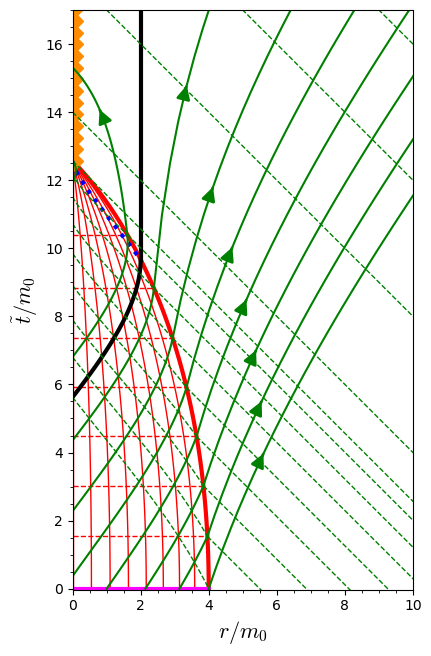

In [63]:
for etas in eta_sel:
    graph += plot_geod_in(etas)

for ti0 in [14, 18, 22, 26]:
    graph += geod_ext_in(ti0, 0, 20).plot(EF, ambient_coords=(r, ti), 
                                          color='green', thickness=1, 
                                          style='--', label_axes=False)

graph.axes_labels([r'$r/m_0$', r'$\tilde{t}/m_0$'])
graph.set_axes_range(xmin=0, xmax=10, ymin=-0.03, ymax=timax)
graph.show(frame=True, axes=False, axes_pad=0, figsize=10)
graph.save('lem_OS_diag_EF.pdf', frame=True, axes=False, 
           axes_pad=0, figsize=10)

In [64]:
graph += plot_geod_out(3*pi/4) + plot_geod_in(5*pi/8)
graph += tsp.plot(chart=EFI, ambient_coords=(r, ti), color='brown',
                  label=' ', size=50) \
              + text(r"$\mathscr{S}$", (0.8, 11.6), color='brown', fontsize=18)
graph += line([(0, ti_end + i*(15 - ti_end)/20) for i in range(21)], 
              thickness=3, color='darkorange', marker='D', markersize=10)

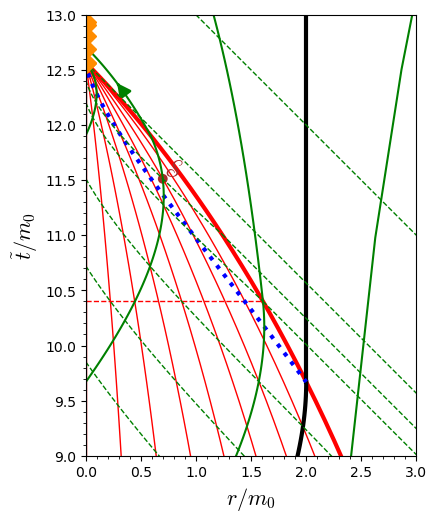

In [65]:
graph.axes_labels([r'$r/m_0$', r'$\tilde{t}/m_0$'])
graph.show(frame=True, figsize=8, axes_pad=0,
           xmin=0, xmax=3, ymin=9, ymax=13)
graph.save('lem_OS_diag_EF_zoom.pdf',frame=True, 
           figsize=8, axes_pad=0, xmin=0, xmax=3, 
           ymin=9, ymax=13)

## Plot for the time delay effect

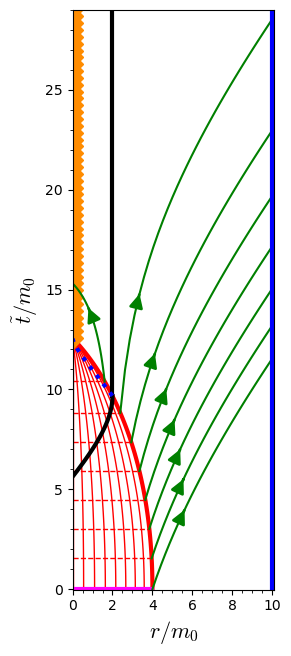

In [66]:
for etas in eta_sel:
    graph_delay += plot_geod_out(etas, plot_int=False)

graph_delay += line([(10, 0), (10, 29)], thickness=3, color='blue')
graph_delay.axes_labels([r'$r/m_0$', r'$\tilde{t}/m_0$'])
graph_delay.set_axes_range(xmin=0, xmax=10.1, ymin=-0.03, ymax=29)
graph_delay.set_aspect_ratio(1)
graph_delay.show(frame=True, axes=False, figsize=10, axes_pad=0)

 ## Plots in Kruskal-Szekeres coordinates

In [67]:
KS.<T,X> = M.chart()
KS

Chart (M, (T, X))

In [68]:
#t1 = 6
t1 = 5
s = (ti - t1)/4
EF_to_KS = EF.transition_map(KS, [exp(r/4)*((exp(s) + exp(-s))/2 - r/4*exp(-s)),
                                  exp(r/4)*((exp(s) - exp(-s))/2 + r/4*exp(-s))])
EF_to_KS.display()

T = -1/4*(r*e^(-1/4*ti + 5/4) - 2*e^(1/4*ti - 5/4) - 2*e^(-1/4*ti + 5/4))*e^(1/4*r)
X = 1/4*(r*e^(-1/4*ti + 5/4) + 2*e^(1/4*ti - 5/4) - 2*e^(-1/4*ti + 5/4))*e^(1/4*r)

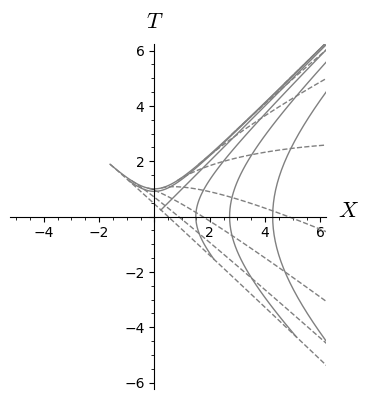

In [69]:
graph = EF.plot(KS, ambient_coords=(X,T), color='grey',
                style={ti: '-', r: '--'},
                ranges={ti: (0, 16), r: (0, 8)}, 
                number_values={ti: 9, r: 9})
graph.show(xmin=-5, xmax=6, ymin=-6, ymax=6)

In [70]:
EF_to_KSI = EF_to_KS.restrict(I)
EF_to_KSI.display()

T = -1/4*(r*e^(-1/4*ti + 5/4) - 2*e^(1/4*ti - 5/4) - 2*e^(-1/4*ti + 5/4))*e^(1/4*r)
X = 1/4*(r*e^(-1/4*ti + 5/4) + 2*e^(1/4*ti - 5/4) - 2*e^(-1/4*ti + 5/4))*e^(1/4*r)

In [71]:
I.atlas()

[Chart (I, (eta, chi)), Chart (I, (ti, r)), Chart (I, (T, X))]

In [72]:
KSI = KS.restrict(I)
KSI is I.atlas()[2]

True

In [73]:
S_to_EF.display()

ti = 4*eta + 4*log(cos(1/2*eta) + sin(1/2*eta)) + 2*sin(eta)
r = 2*sqrt(2)*(cos(eta) + 1)*sin(chi)

In [74]:
I.set_simplify_function(simplify)
S_to_KS = EF_to_KSI * S_to_EF
S_to_KS.display()

T = -1/2*(sqrt(2)*(cos(eta) + 1)*e^(-eta - 1/2*sin(eta) + 5/4)*sin(chi)/(cos(1/2*eta) + sin(1/2*eta)) - (cos(1/2*eta) + sin(1/2*eta))*e^(eta + 1/2*sin(eta) - 5/4) - e^(-eta - 1/2*sin(eta) + 5/4)/(cos(1/2*eta) + sin(1/2*eta)))*e^(1/2*sqrt(2)*(cos(eta) + 1)*sin(chi))
X = 1/2*(sqrt(2)*(cos(eta) + 1)*e^(-eta - 1/2*sin(eta) + 5/4)*sin(chi)/(cos(1/2*eta) + sin(1/2*eta)) + (cos(1/2*eta) + sin(1/2*eta))*e^(eta + 1/2*sin(eta) - 5/4) - e^(-eta - 1/2*sin(eta) + 5/4)/(cos(1/2*eta) + sin(1/2*eta)))*e^(1/2*sqrt(2)*(cos(eta) + 1)*sin(chi))

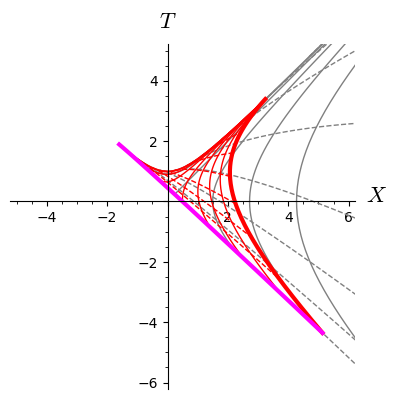

In [75]:
graph += S.plot(KSI, ambient_coords=(X, T), style={eta: '-', chi: '--'},
               number_values={eta: 2, chi: 9}, label_axes=False) 

# The stellar surface:
graph += surf.plot(chart=KSI, ambient_coords=(X, T), color='red',
                   thickness=3, label_axes=False)

# Constant tau lines:
for iso_tau in iso_taus:
    graph += iso_tau.plot(chart=KSI, ambient_coords=(X, T), color='red',
                          style='--', label_axes=False)

# The initial star:
graph += init.plot(chart=KSI, ambient_coords=(X, T), color='magenta',
                   thickness=3, label_axes=False)

graph.show(xmin=-5, xmax=6, ymin=-6, ymax=5)

Check that the matter singularity occurs at the same point in the $(T,X)$ plane:

In [76]:
Ts, Xs = map(numerical_approx, KS(matter_sing(0)))
Ts, Xs

(3.39037541861741, 3.23954402334112)

In [77]:
Ts, Xs = map(numerical_approx, KS(matter_sing(chis/2)))
Ts, Xs

(3.39037541861741, 3.23954402334112)

In [78]:
Ts, Xs = map(numerical_approx, KS(matter_sing(chis)))
Ts, Xs

(3.39037541861741, 3.23954402334112)

Plot of the singularity in all spacetime:

In [79]:
Xsing = [Xs +  i*(5 - Xs)/20 for i in range(21)]
sing_plot = line([(X1, sqrt(1 + X1^2)) for X1 in Xsing], 
                 color='darkorange', thickness=3, 
                 marker='s', markersize=7)
graph += sing_plot

Adding the horizon:

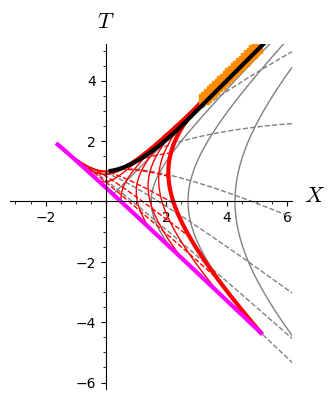

In [80]:
graph += hor_int.plot(chart=KSI, ambient_coords=(X, T), color='black', 
                      thickness=3, label_axes=False)
graph += hor_ext.plot(chart=KS, ambient_coords=(X, T), color='black', 
                      thickness=3, label_axes=False)
graph.show(xmin=-3, xmax=6, ymin=-6, ymax=5)

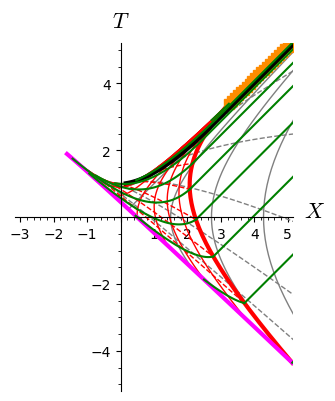

In [81]:
for etas in eta_sel:
    graph += plot_geod_out(etas, chart=KS, plot_tangent=False) 
graph.show(xmin=-3, xmax=5, ymin=-5, ymax=5)

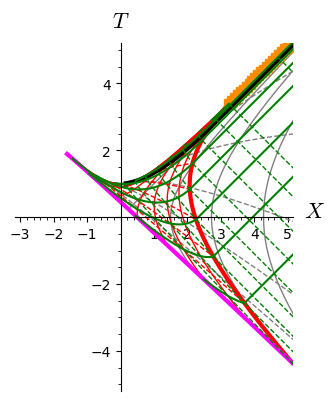

In [82]:
for etas in eta_sel:
    graph += plot_geod_in(etas, chart=KS) 

graph += geod_ext_in(14, 0, 20).plot(chart=KS, ambient_coords=(X, T), 
                                          color='green', thickness=1, 
                                          style='--', label_axes=False)

graph.show(xmin=-3, xmax=5, ymin=-5, ymax=5)

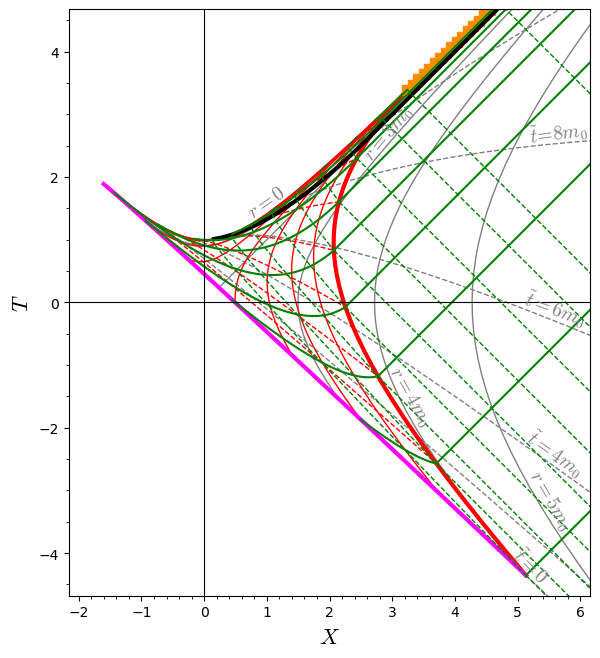

In [83]:
graph1 = copy(graph)

graph += text(r'$\tilde{t} = 0$', (5.2, -4.2), color='grey', rotation=-45, fontsize=14)
graph += text(r'$\tilde{t} = 4m_0$', (5.6, -2.4), color='grey', rotation=-35, fontsize=14)
graph += text(r'$\tilde{t} = 6m_0$', (5.6, -0.1), color='grey', rotation=-20, fontsize=14)
graph += text(r'$\tilde{t}\!=\!8m_0$', (5.65, 2.72), color='grey', rotation=7, fontsize=14)
graph += text(r'$r=0$', (1, 1.6), color='grey', rotation=35, fontsize=14)
graph += text(r'$r=3m_0$', (2.95, 2.7), color='grey', rotation=50, fontsize=14)
graph += text(r'$r=4m_0$', (3.28, -1.5), color='grey', rotation=-60, fontsize=14)
graph += text(r'$r=5m_0$', (5.52, -3.15), color='grey', rotation=-60, fontsize=14)
graph.show(xmin=-2, xmax=6, ymin=-4.5, ymax=4.5, figsize=10,
           frame=True)
graph.save('lem_OS_diag_KS.pdf', xmin=-2, xmax=6, ymin=-4.5, 
           ymax=4.5, figsize=10, frame=True)

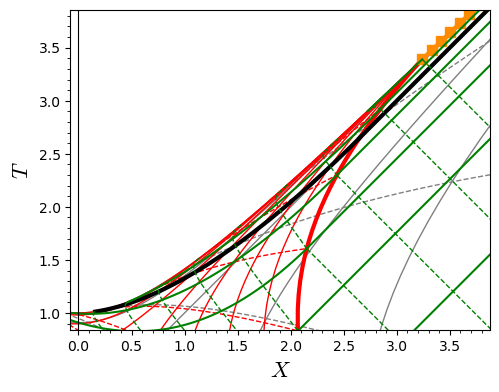

In [84]:
graph1.show(xmin=0., xmax=3.8, ymin=0.9, ymax=3.8, aspect_ratio=1,
           frame=True)

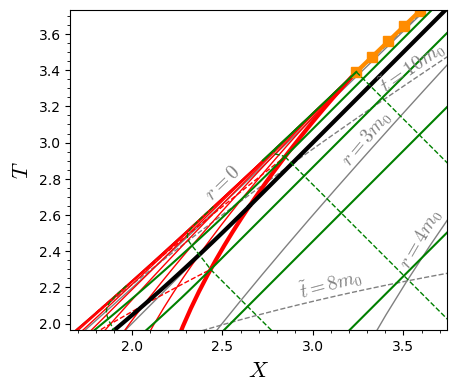

In [85]:
graph1 += text(r'$\tilde{t}=8m_0$', (3.1, 2.22), color='grey', rotation=15, fontsize=14)
graph1 += text(r'$\tilde{t}=10m_0$', (3.55, 3.42), color='grey', rotation=35, fontsize=14)
graph1 += text(r'$r = 4m_0$', (3.6, 2.47), color='grey', rotation=60, fontsize=14)
graph1 += text(r'$r = 3m_0$', (3.3, 3.02), color='grey', rotation=50, fontsize=14)
graph1 += text(r'$r = 0$', (2.5, 2.78), color='grey', rotation=44, fontsize=14)

graph1.show(xmin=1.7, xmax=3.7, ymin=2, ymax=3.7, aspect_ratio=1, frame=True)
graph1.save('lem_OS_diag_KS_zoom.pdf', xmin=1.7, xmax=3.7, ymin=2, ymax=3.7, 
           aspect_ratio=1, frame=True)